In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df = df[df["person_age"]<=113]

Usunięcie z dataset'u przypadków, w których osoba ma więcej niż 113 lat (nie istniały takie osoby w historii).

[68.42425348172475, 92.53095975232199, 87.4274661508704, 69.1588785046729]
['RENT' 'OWN' 'MORTGAGE' 'OTHER']


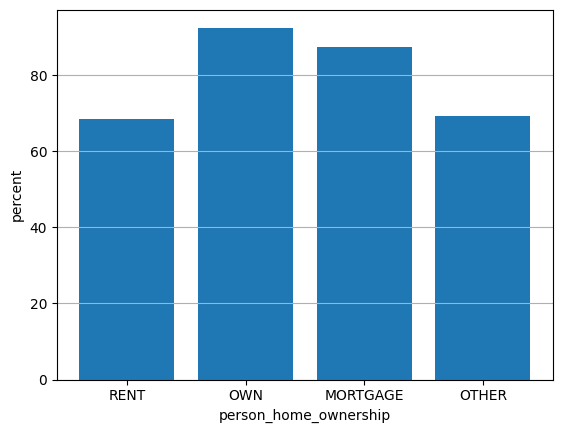

In [6]:
repayed_percent_home_ownership = []
for person_home_ownership in df['person_home_ownership'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['person_home_ownership'] == person_home_ownership)]) / len(df[df['person_home_ownership'] == person_home_ownership]) * 100
    repayed_percent_home_ownership.append(x)

print(repayed_percent_home_ownership)
print(df['person_home_ownership'].unique())


plt.bar(df['person_home_ownership'].unique(), repayed_percent_home_ownership)
plt.xlabel('person_home_ownership')
plt.ylabel('percent')
plt.grid(axis='y')
plt.show()

[80.1086956521739, 82.77786389707022, 73.29929171470927, 85.18453734476124, 73.89736477115117, 71.41212586339218]
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


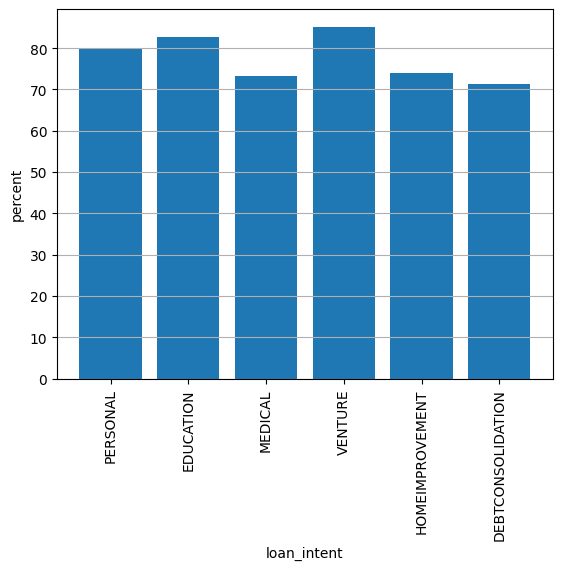

In [7]:
repayed_percent_loan_intent = []
for loan_intent in df['loan_intent'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['loan_intent'] == loan_intent)]) / len(df[df['loan_intent'] == loan_intent]) * 100
    repayed_percent_loan_intent.append(x)

print(repayed_percent_loan_intent)
print(df['loan_intent'].unique())

plt.bar(df['loan_intent'].unique(), repayed_percent_loan_intent)
plt.xlabel('loan_intent')
plt.ylabel('percent')
plt.grid(axis='y')
plt.xticks(rotation='vertical')
plt.show()

[62.193211488250654, 81.60336923707652]
['Y' 'N']


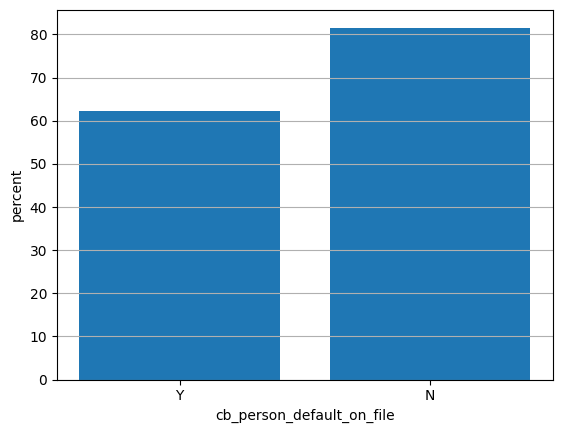

In [8]:
repayed_percent_history_default = []
for cb_person_default_on_file in df['cb_person_default_on_file'].unique():
    x = len(df[(df['loan_status'] == 0) & (df['cb_person_default_on_file'] == cb_person_default_on_file)]) / len(df[df['cb_person_default_on_file'] == cb_person_default_on_file]) * 100
    repayed_percent_history_default.append(x)

print(repayed_percent_history_default)
print(df['cb_person_default_on_file'].unique())

plt.bar(df['cb_person_default_on_file'].unique(), repayed_percent_history_default)
plt.xlabel('cb_person_default_on_file')
plt.ylabel('percent')
plt.grid(axis='y')
plt.show()

In [5]:
column_values = df['person_home_ownership'].unique()
print(column_values)

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [6]:
column_values = df['loan_intent'].unique()
print(column_values)

['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [7]:
column_values = df['loan_grade'].unique()
print(column_values)

['D' 'B' 'C' 'A' 'E' 'F' 'G']


In [8]:
column_values = df['cb_person_default_on_file'].unique()
print(column_values)

['Y' 'N']


Zmiana wartości w kolumnach na liczbowe.

In [9]:
df = pd.get_dummies(df, prefix=['person_home_ownership'], columns=['person_home_ownership'])

In [10]:
df = pd.get_dummies(df, prefix=['loan_intent'], columns=['loan_intent'])

In [11]:
df.loan_grade = df.loan_grade.map( {'A':6 , 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0} )

In [12]:
df.cb_person_default_on_file = df.cb_person_default_on_file.map( {'N':0 , 'Y':1} )

In [13]:
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,0,0,0,1,0,0,0,0,1,0
1,21,9600,5.0,5,1000,11.14,0,0.10,0,2,0,0,1,0,0,1,0,0,0,0
2,25,9600,1.0,4,5500,12.87,1,0.57,0,3,1,0,0,0,0,0,0,1,0,0
3,23,65500,4.0,4,35000,15.23,1,0.53,0,2,0,0,0,1,0,0,0,1,0,0
4,24,54400,8.0,4,35000,14.27,1,0.55,1,4,0,0,0,1,0,0,0,1,0,0


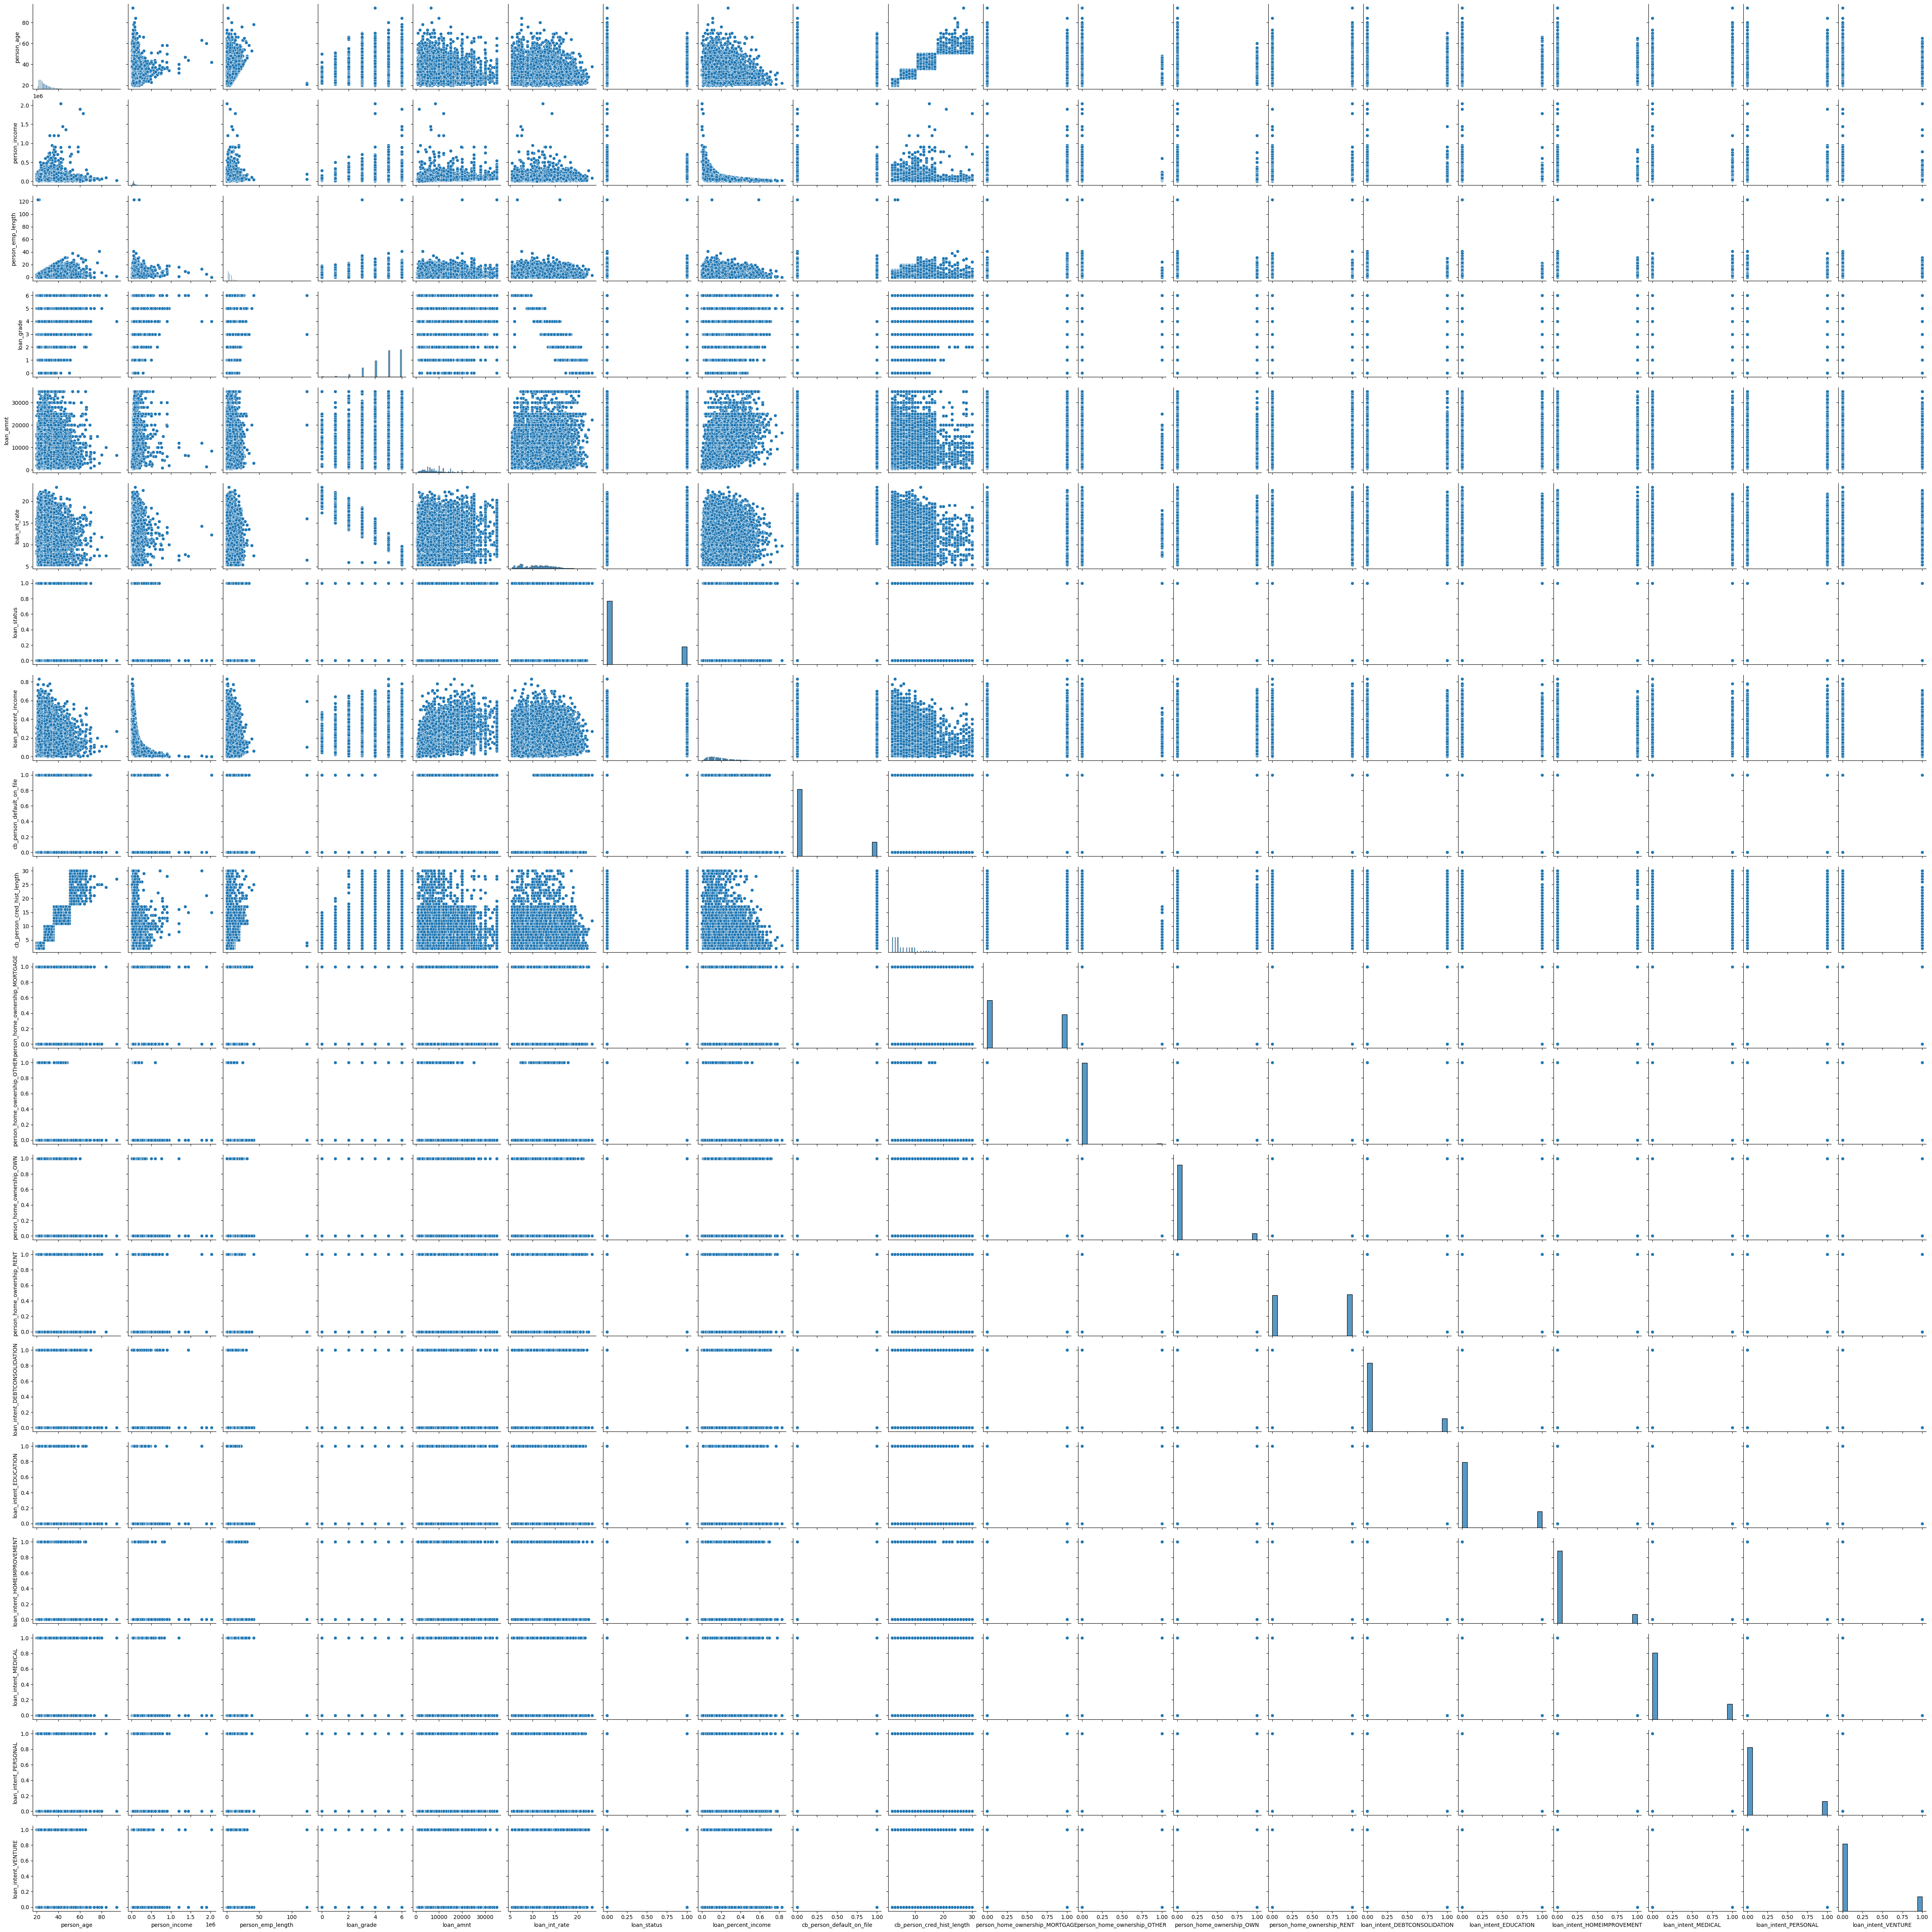

In [14]:
sns.pairplot(df, kind="scatter")
plt.show()

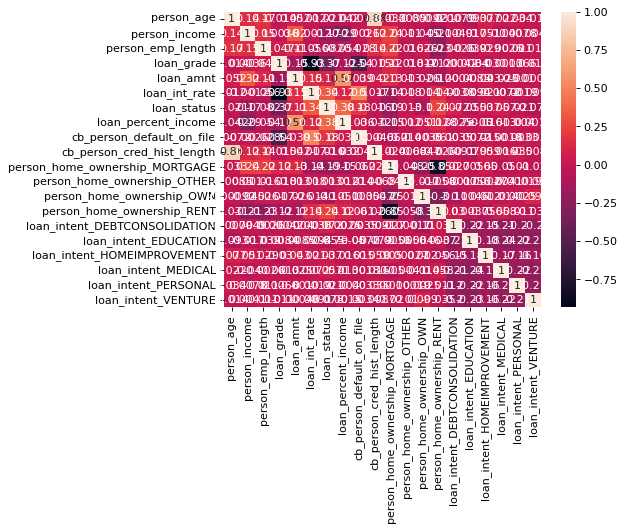

In [15]:
plt.figure(dpi = 80)
sns.heatmap(df.corr(),annot = df.corr())
plt.show()

In [57]:
#print(df.columns)

#print(df["loan_int_rate"].unique())
pd.set_option('display.max_rows', 20)
# print(df["loan_int_rate"])
df1 = df.isnull()
#print(df1)
for c in df1.columns:
    if True in df1[c]:
        print(c)

Sprawdzamy które kolumny zawierają braki:

In [ ]:

for col in df.columns:
    if df[col].isnull().values.any():
        print(f'Kolumna {col} zawiera braki.')


Kolumna person_emp_length zawiera braki.
Kolumna loan_int_rate zawiera braki.


In [8]:
print("Liczba braków w kolumnie person_emp_length: ",df['person_emp_length'].isnull().sum())
print("Liczba braków w kolumnie loan_int_rate: ",df['loan_int_rate'].isnull().sum())

Liczba braków w kolumnie person_emp_length:  895
Liczba braków w kolumnie loan_int_rate:  3116


Jako że danych nie jest dużo to usunięcie wierszy ograniczy nasz model, dlatego w miejsce brakujących danych wstawimy mediany wartości w danych kolumnach. Niestety umożliwi to pojawienie się błędu statystycznego, ale na szczęście wartości tych kolumn nie posiadają zbyt dużego rozrzutu. 

In [10]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)